In [22]:
import pandas as pd
from sentence_transformers import SentenceTransformer

In [24]:
domain_df = pd.read_csv('/content/clear_domain.csv', index_col=0)

In [26]:
domains = domain_df['GICS Sector'].values

In [27]:
model = SentenceTransformer('sentence-transformers/stsb-bert-large')
embeddings = model.encode(domains)

In [28]:
embeddings.shape

(428, 1024)

In [30]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
pca = PCA()

embeddings_std = sc.fit_transform(embeddings)
embeddings_pca = pca.fit_transform(embeddings_std)

In [31]:
eigen_vals, eigen_vecs = pca.explained_variance_, pca.components_

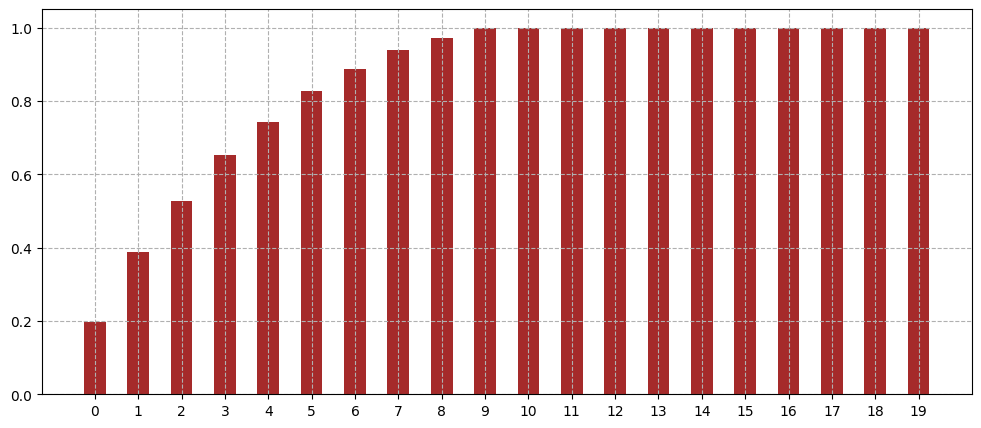

In [58]:
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize = (12,5))

plt.bar(np.arange(20), (np.cumsum(eigen_vals)/np.sum(eigen_vals))[:20], color='brown', width=0.5)

plt.grid(ls='--')

plt.xticks(np.arange(20))

plt.show()

In [62]:
np.save('/content/embedding.npy',(embeddings_std @ eigen_vecs.T[:, :7]))